In [1]:
import pandas as pd

In [21]:
df = pd.read_csv('NFL_draft_data - stats.csv')

In [22]:
df.head()

,NAME,ATT,COMPLETIONS,INT,PCT,TD,YDS,YPA,Drafted,draft_year
0,Brady White,418,252,10,0.603,31,3376,8.1,0,2021
1,Chris Ferguson,37,19,0,0.514,4,197,5.3,0,2021
2,Collin Hill,211,124,6,0.588,6,1393,6.6,0,2021
3,Davis Mills,193,127,3,0.658,7,1510,7.8,1,2021
4,Feleipe Franks,237,162,4,0.684,17,2091,8.8,0,2021


In [23]:
df.isnull().sum()

NAME           0
ATT            0
COMPLETIONS    0
INT            0
PCT            0
TD             0
YDS            0
YPA            0
Drafted        0
draft_year     0
dtype: int64

In [24]:
df.shape

(58, 10)

In [26]:
df.columns = df.columns.str.lower()

In [28]:
df.drafted.value_counts()

0    39
1    19
Name: drafted, dtype: int64

## Doing the split

In [10]:
from sklearn.model_selection import train_test_split

In [29]:
X = df.drop(columns = ['name', 'drafted', 'draft_year'])
y = df[['drafted']]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 69)

## Using the forests algorithm

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

/Users/marcosrubio/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


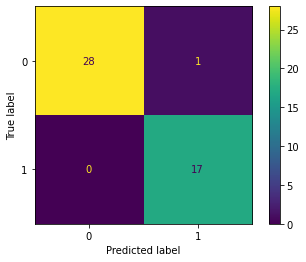

In [39]:
best_forest = RandomForestClassifier(max_depth=5, n_estimators=50, criterion = "log_loss").fit(X_train, y_train.values.ravel())
metrics.plot_confusion_matrix(best_forest, X_train, y_train)

/Users/marcosrubio/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


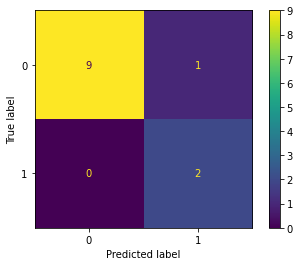

In [40]:
metrics.plot_confusion_matrix(best_forest, X_test, y_test)

In [99]:
pred_test_qb = best_forest.predict(X_test)

In [100]:
metrics.accuracy_score(y_test, pred_test_qb)

0.9166666666666666

# Trying another position, Running Back

In [112]:
df_rb = pd.read_csv('NFL_draft_data - full_stats_rb.csv')

In [113]:
df_rb = df_rb.fillna(0)

In [114]:
df_rb.head()

,Name,num_carries,fumbles,longest_receiving_yards,longest_rushing_yards,receptions,receiving_touchdowns,rushing_touchdowns,kick_returns_total_yards,receiving_total_yards,rushing_total_yards,yards_per_carry,yards_per_reception,weight,height,40_yards_combine,drafted,year
0,Aaron McAllister,37.0,1.0,71.0,66.0,6.0,1.0,3.0,157.0,90.0,254.0,6.9,15.0,216,5.10,4.55,0,2021
1,B.J. Emmons,37.0,0.0,6.0,46.0,3.0,0.0,1.0,0.0,13.0,157.0,4.2,4.3,220,6.00,0.00,0,2021
2,B.J. Smith,73.0,0.0,29.0,38.0,26.0,0.0,3.0,0.0,227.0,277.0,3.8,8.7,216,5.90,4.63,0,2021
3,Ben Mason,37.0,0.0,9.0,0.0,2.0,1.0,7.0,0.0,17.0,32.0,1.0,8.5,254,6.30,4.73,1,2021
4,Brenden Knox,185.0,0.0,58.0,45.0,7.0,1.0,9.0,26.0,86.0,887.0,4.8,12.3,220,5.11,4.64,0,2021


In [115]:
X_rb = df_rb.drop(columns = ['Name', 'drafted', 'year'])
y_rb = df_rb[['drafted']]

In [116]:
X_train_rb, X_test_rb, y_train_rb, y_test_rb = train_test_split(X_rb, y_rb, test_size = 0.2, random_state = 69)

In [117]:
forest_rb = RandomForestClassifier(max_depth=5, n_estimators=100, criterion = "log_loss").fit(X_train_rb, y_train_rb.values.ravel())

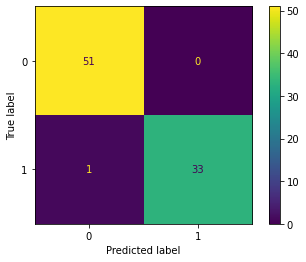

In [118]:
metrics.ConfusionMatrixDisplay.from_estimator(forest_rb, X_train_rb, y_train_rb)

/Users/marcosrubio/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


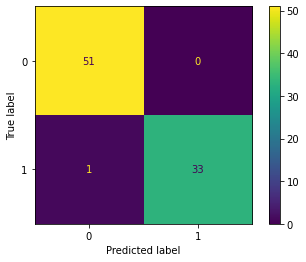

In [88]:
metrics.plot_confusion_matrix(forest_rb, X_train_rb, y_train_rb)

/Users/marcosrubio/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


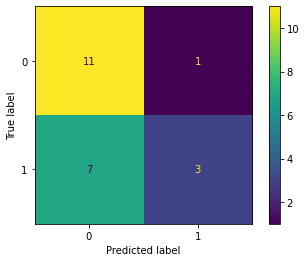

In [89]:
metrics.plot_confusion_matrix(forest_rb, X_test_rb, y_test_rb)

In [119]:
predict_rb = forest_rb.predict(X_test_rb)

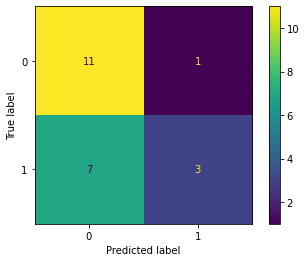

In [109]:
metrics.ConfusionMatrixDisplay.from_estimator(forest_rb, X_test_rb, y_test_rb)

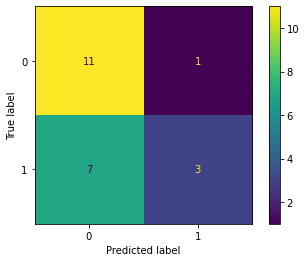

In [120]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_rb, predict_rb)

In [121]:
forest_rb.feature_importances_

array([0.11451069, 0.01149802, 0.04579986, 0.05869914, 0.0882747 ,
       0.0307983 , 0.10339681, 0.02158799, 0.09881558, 0.08705844,
       0.0541712 , 0.06203718, 0.10579403, 0.03806565, 0.07949239])

In [122]:
len(forest_rb.feature_importances_)

15

In [127]:
X_train_rb.columns

Index(['num_carries', 'fumbles', 'longest_receiving_yards',
       'longest_rushing_yards', 'receptions', 'receiving_touchdowns',
       'rushing_touchdowns', 'kick_returns_total_yards',
       'receiving_total_yards', 'rushing_total_yards', 'yards_per_carry',
       'yards_per_reception', 'weight', 'height', '40_yards_combine'],
      dtype='object')

In [128]:
df_rb_small = df_rb[['num_carries', 'receptions', 'rushing_touchdowns', 'receiving_total_yards', 'rushing_total_yards', 'weight', '40_yards_combine', 'drafted']]

In [130]:
X_rb_2 = df_rb_small.drop(columns = ['drafted'])
y_rb_2 = df_rb_small[['drafted']]

In [131]:
X_train_rb_2, X_test_rb_2, y_train_rb_2, y_test_rb_2 = train_test_split(X_rb_2, y_rb_2, test_size = 0.2, random_state = 69)

In [132]:
forest_rb_2 = RandomForestClassifier(max_depth=5, n_estimators=100, criterion = "log_loss").fit(X_train_rb_2, y_train_rb_2.values.ravel())

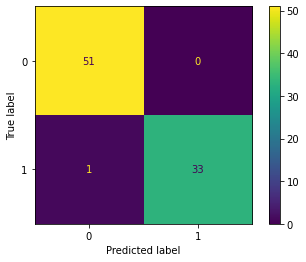

In [133]:
metrics.ConfusionMatrixDisplay.from_estimator(forest_rb_2, X_train_rb_2, y_train_rb_2)

In [134]:
predict_rb_2 = forest_rb_2.predict(X_test_rb_2)

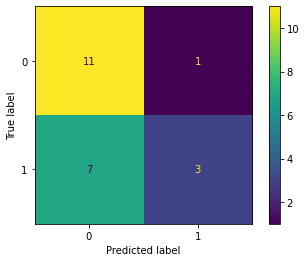

In [135]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_rb_2, predict_rb_2)

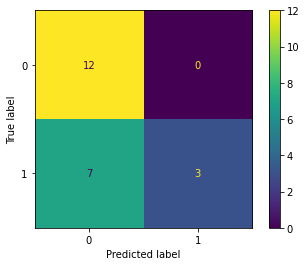

In [111]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_rb, predict_rb)

In [105]:
pd.DataFrame(predict_rb).value_counts()

0    19
1     3
dtype: int64

In [107]:
y_test_rb.value_counts()

drafted
0          12
1          10
dtype: int64

In [101]:
metrics.accuracy_score(y_test_rb, predict_rb)

0.6818181818181818

In [66]:
X_test_rb.index

Int64Index([  8,  13,  65,  17,  62,  89,  51,  33,  10, 103,  96,  60,  83,
             34,  74,  30,  26,  99,  28,  86, 102,  31],
           dtype='int64')

In [67]:
df_check_rb = pd.DataFrame(X_test_rb.index)

In [68]:
df_check_rb['prediction'] = predict_rb

In [70]:
df_check_rb[df_check_rb['prediction'] == 1]

,0,prediction
6,51,1
14,74,1
18,28,1


In [103]:
df_rb.loc[[51,74,28]]

,Name,num_carries,fumbles,longest_receiving_yards,longest_rushing_yards,receptions,receiving_touchdowns,rushing_touchdowns,kick_returns_total_yards,receiving_total_yards,rushing_total_yards,yards_per_carry,yards_per_reception,drafted,year
51,Brian Robinson,271.0,1.0,51.0,63.0,35.0,2.0,14.0,0.0,296.0,1343.0,5.0,8.5,1,2022
74,Keaontay Ingram,156.0,1.0,32.0,53.0,22.0,0.0,5.0,0.0,156.0,911.0,5.8,7.1,1,2022
28,Larry Rountree III,209.0,1.0,23.0,46.0,15.0,0.0,14.0,0.0,100.0,972.0,4.7,6.7,1,2021


## Trying another algorithm for running backs to see if it performs better

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
linreg = LinearRegression().fit(X_train_rb, y_train_rb)

In [93]:
linreg.score(X_train_rb, y_train_rb)

0.22479494462955552

In [94]:
linreg.score(X_test_rb, y_test_rb)

0.20950416600059485

In [97]:
linreg.predict(X_test_rb)

array([[0.29128166],
       [0.46758598],
       [0.35243734],
       [0.34742662],
       [0.2267948 ],
       [0.18548689],
       [0.61562206],
       [0.33849663],
       [0.21345511],
       [0.5355321 ],
       [0.53774668],
       [0.20649529],
       [0.2492197 ],
       [0.30075449],
       [0.45145826],
       [0.3701862 ],
       [0.39940027],
       [0.37380022],
       [0.60101689],
       [0.46534992],
       [0.63484352],
       [0.61715675]])

# Trying for Wide receivers

In [136]:
df_wr = pd.read_csv('NFL_draft_data - full_stats_wr.csv')

In [137]:
df_wr.head()

,name,longest_reception,receptions,touchdowns,total_yards,yards_per_reception,weight,height,40_yards_combine,drafted
0,Adrian Hardy,32.0,33,4,440,13.3,205,6.20,4.52,0
1,Amari Rodgers,83.0,77,7,1020,13.2,210,5.10,4.40,1
2,Amon-Ra St. Brown,48.0,41,7,478,11.7,195,6.10,4.51,1
3,Anthony Schwartz,91.0,54,3,652,12.1,179,6.00,4.26,1
4,Antonio Nunn,82.0,36,2,579,16.1,204,5.11,4.47,0


In [141]:
df_wr = df_wr.fillna(0)

In [142]:
X_wr = df_wr.drop(columns = ['name', 'drafted'])
y_wr = df_wr[['drafted']]

In [143]:
X_train_wr, X_test_wr, y_train_wr, y_test_wr = train_test_split(X_wr, y_wr, test_size = 0.2, random_state = 69)

In [144]:
forest_wr = RandomForestClassifier(max_depth=5, n_estimators=100, criterion = "log_loss").fit(X_train_wr, y_train_wr.values.ravel())

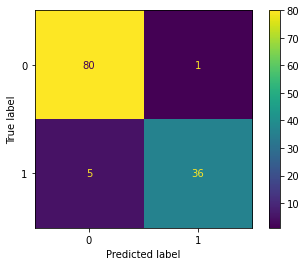

In [145]:
metrics.ConfusionMatrixDisplay.from_estimator(forest_wr, X_train_wr, y_train_wr)

In [146]:
predict_wr = forest_wr.predict(X_test_wr)

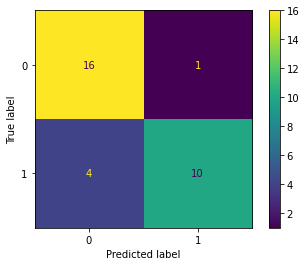

In [147]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_wr, predict_wr)

In [149]:
metrics.accuracy_score(y_test_wr, predict_wr)

0.8387096774193549

In [150]:
forest_wr.feature_importances_

array([0.12970309, 0.11769447, 0.10836679, 0.15487756, 0.11518468,
       0.07936021, 0.05123095, 0.24358226])

In [151]:
X_train_wr.columns

Index(['longest_reception', 'receptions', 'touchdowns', 'total_yards',
       'yards_per_reception', 'weight', 'height', '40_yards_combine'],
      dtype='object')